In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
def GeneratePointInCycle1(point_num, radius,cx,cy, var=0.5):
    xl=[]
    yl=[]
    for i in range(1, point_num+1):
        while True:
            x = random.uniform(-radius, radius)
            y = random.uniform(-radius, radius)
            if (x**2) + (y**2) < (radius**2):
                break
        xl.append(x+cx+np.random.normal(0,var))
        yl.append(y+cy+np.random.normal(0,var))
    
    return list(zip(xl,yl))

def DrawPoints(xy1,xy2):
    [x1,y1]=list(zip(*xy1))
    [x2,y2]=list(zip(*xy2))
    plt.xlim((-6,6))
    plt.ylim((-6,6))
    my_x_ticks = np.arange(-5, 5, 1)
    my_y_ticks = np.arange(-5, 5, 1)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.grid(linestyle='-.')
    plt.plot(x1,y1, '+', color = "blue")
    plt.plot(x2,y2, 'o', color = "red")

In [7]:
xy1=GeneratePointInCycle1(50, 2,2,2)
xy2=GeneratePointInCycle1(50, 2,-2,-3)

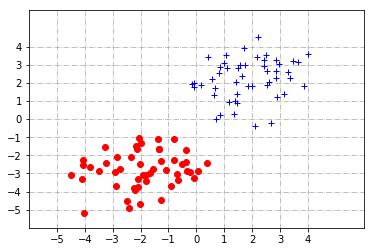

In [8]:
DrawPoints(xy1,xy2)

In [9]:
X1= np.array(xy1)
X2= np.array(xy2)
X = np.vstack((X1,X2))
X.shape

(100, 2)

In [13]:
Y=np.array([1 for i in range(100)])
Y[:50]=[-1 for i in range(50)]
np.sum(Y)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
def perceptron(dataMat, labelMat, epochs=50, lr=0.01):
    n,m = np.shape(dataMat)
    W = np.random.randn(m)
    b = 0
    X=dataMat
    Y=labelMat
    for t in range(epochs):
        '''
        with np.errstate(invalid='ignore'):
            tmp=Y*(np.dot(X,W)+b)
            w1=  np.sum(X[tmp<0][:,0]*Y[tmp<0])
            w2 =  np.sum(X[tmp<0][:,1]*Y[tmp<0])
            if np.isnan(w1) : w1=0
            if np.isnan(w2) : w2=0
            W+= lr*np.array(w1,w2)
            db = np.sum(Y[tmp<0])
            if np.isnan(db) : db=0
            b+= lr*db
        '''
        for i in range(n):
            xi = X[i]
            yi = Y[i]
            if yi*(np.dot(xi,W) + b) <0:
                W+= lr*yi*xi.reshape(2,)
                b+= lr*yi
        
    return W,b

In [26]:
W,b=perceptron(X,Y,5000,0.001)

In [27]:
wf = -W[1]/W[0]
bf = -b/W[0]

In [28]:
x = np.linspace(-6,6,1000)
y = [wf*i+bf for i in x]

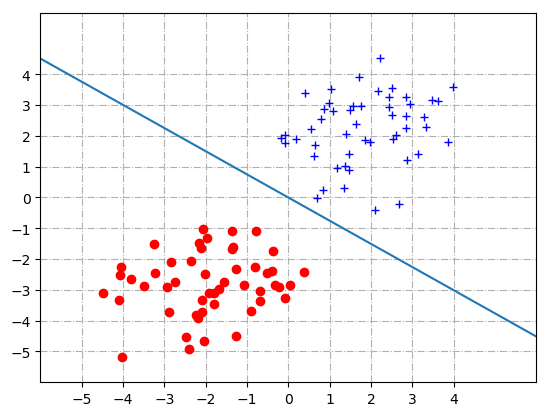

In [29]:
#plt.style.use('default')
plt.plot(x,y)
DrawPoints(xy1,xy2)